# A real-life system
Suppose we have a large lake surrounded by houses, and a ship tied to a pier.
Causes for changes in the water level:
- Rain causes the level of the lake to rise
- Evaporation, water taken out by farmers for irrigation and "leakage" to the ground water lower than the level of the lake

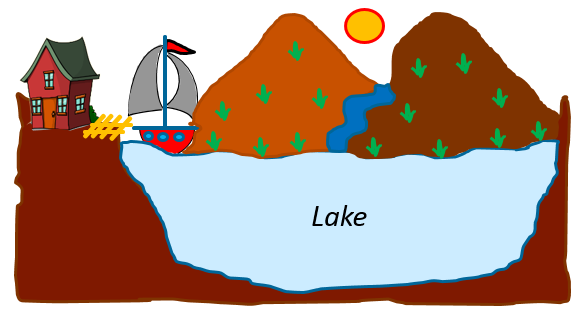

To prevent flooding in the hoses near the lake, the govenment has installed pumps that can pump water to the ocean
- The pumps are not capable of pumping out the maximum flow all the time (too expensive)
- THe water level should typically be maintained at a level to allow people to board the ship easily
- We can allow for some variation in the water level

# How do we develop a mathematical model for the lake?
Steps involved in developing a model:
1. Define the scope of the model
2. Draw the system and its boundaries
3. Acquire the relevant information and knowledge for modelling the system in question
4. Write down the assumptions
5. Write down the equations
6. Implement the equations and run the simulation
7. Validate the model
8. Document the model

# Step 1. Define the scope of the model
Suppose we learn from the Meteorology department that there will be massive rainfall.
<center><font color=blue>How much water should we pump out to keep the level of the lake acceptable?</font></center>

Why do we need the model?
- A model allows us to predict what will happen to the water levle under different scenarios

What infomration do we have available?
- If we are missing information, such as the amount of water going into the ground, we need to make some assumptions or change the goal of the model

What can we assume based on the circumstatnces?
- We may choose to neglect evaporation if we know it is very small compared to other flows in and out of hte lake

What will our model need to predict?
- The liquid level in the lake

What results do we observe?

Are the predictions valid?
- What tests can we conduct in order to check their consistencies?

Is the model useful in terms of the initial reason it was developed?
- Are there any ways of improving it?

# Step 2. Draw the system and its boundaries
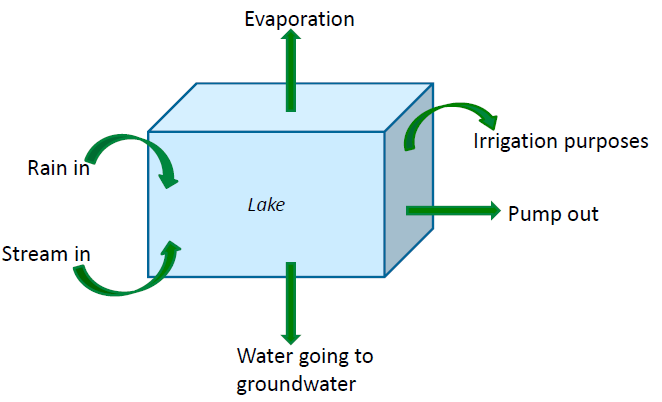

# Step 3. Acquire relevant information and knowledge
Relevant information can be gathered from:
- Papers on studies of the lake
- Weather service webpages for usual trends and possible anomalies
- Books on hydrology

Once we study the information and talk to experts, we start to acquire knowledge


# Step 4. Write down the assumptions
Assumptions fall into different categories:
- Physical assumptions: Assumptions on physical grounds, e.g. the density of the water is constant and given
- Mathematical assumptions: Assumptions based on mathematical grounds, e.g. the shape of the lake to be a simple box
- Lack of knowledge: Assumptions caused by a lack of knowledge on the system, e.g. that the average water flow to the ground water is 10 kg/s and a constant average evaporation for each month

# Step 5. Write down the equations
Balance equations are the basis of most models

We almost always start with a mass (material) balance (mass conservation)

We track what we call the hold-up, which is the amount held inside the system

The general form of balance:
\begin{equation}
\ {Change}\,{in}\,{holdup}\,{over}\,{time} = in - out + generation - destruction
\end{equation}

Change in hold-up over time is typicall called accumulation

For the lake, we could write:
- Change in hold-up over time:
\begin{equation}
\frac{dM}{dt}
\end{equation}
- In:
\begin{equation}
F_{rain} + F_{stream}
\end{equation}
- Out:
\begin{equation}
F_{evap} + F_{ground} + F_{farmers} + F_{pump}
\end{equation}

Note: there are no generation or destruction terms in our model

|Variable | Meaning |
|--- | --- |
|$M$ | Mass of water in the lake (Mg) |
|$F_{rain}$ | Mass flow of rain into the lake (Mg/min) |
|$F_{stream}$ | Mass flow of stream coming into the lake (Mg/min) |
|$F_{evap}$ | Mass flow evaporating water (Mg/min) |
|$F_{ground}$ | Mass flow of water going to ground water (Mg/min) |
|$F_{farmers}$ | Mass flow of water taken out of lake by farmers (Mg/min) |
|$F_{pump}$ | Mass flow of water pumped out of the lake (Mg/min) |


Combining equations (1) to (4):
\begin{equation}
\frac{dM}{dt} = F_{rain} + F_{stream} - F_{evap} - F_{ground} - F_{farmers} - F_{pump}
\end{equation}

After we have written down the balances, we can write the algebraic equations

The algebraic equations describe "static" relations between variables
- In the lake example, we can define the mass holdup as a function of the volume and density:
\begin{equation}
\ M = \rho V
\end{equation}
- We can write the volume as a function of the level in the lake and the area:
\begin{equation}
\ V = Ah
\end{equation}

|Variable | Meaning |
|--- | --- |
|$\rho$| Mass density of water (kg/m$^{3}$) |
|$V$| Volume of water in lake (k.m$^{3}$) |
|$A$| Area of water in lake (k.m$^{2}$) |
|$h$| Level of the water in the lake (m) |

## Step 5.1 Write down the equations (initial conditions)
The accumulation term ($\frac{d}{dt}$) only describes how the system changes with time

We therefore need to know where the system starts; this is call teh "initial condition"

<center><font color=blue>For every equation with a $\frac{d}{dt}$ term (differential equation), we need an initial condition</font></center>

For the lake example, for $A = 100$ k.m$^{2}$ and $\rho = 1000$ kg/m$^{3}$ we could use any of the following conditions:
- $M = 1\cdot10^6$ Mg
- $V = 1\cdot10^3$ k.m$^{3}$
- $h = 10$ m

## Step 5.2 Write down the equations - Summary
- 3 equations:
\begin{equation}
\frac{dM}{dt} = F_{rain} + F_{stream} - F_{evap} - F_{ground} - F_{farmers} - F_{pump}
\end{equation}
\begin{equation}
\ M = \rho V
\end{equation}
\begin{equation}
\ V = Ah
\end{equation}

- 2 parameters: $\rho$, $A$ (parameters do not change during the simulation)

- 9 variables: $M, V, h, F_{rain}, F_{stream}, F_{evap}, F_{ground}, F_{farmers}, F_{pump}$

<center><font color=blue>Note: Time is an independent variable here</font></center>

# Step 6. Implement the equations and run the simulation

## 6.1 Import packages needed to run the simulation

In [9]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

## 6.2 Create a model and define the parameters and variables

In [10]:
m = GEKKO() # create GEKKO model
m.time = np.linspace(0,120,120) # define the time over which to solve the model

# define the constant parameters
rho = m.Const(value = 1000)
A = m.Const(value = 100)

# define the varibles.
# Note in this instance since we're not altering them over the course of the simulation they are defined as constants
Frain = m.Const(value = 320.76)
Fstream = m.Const(value = 10.8)
Fevap = m.Const(value = 0.093)
Fground = m.Const(value = 0.6)
Ffarmers = m.Const(value = 1.2)
Fpump = m.Const(value = 100)

# for this instance these are true variables and will change over the course of the simulation
M = m.Var(value = 1e6)
V = m.Var(value = 1000)
h = m.Var(value = 10)
t = m.Param(value=m.time)

## 6.3 Define the equations

In [11]:
m.Equation(M.dt() == Frain+Fstream-Fevap-Fground-Ffarmers-Fpump) # our balance equation
m.Equation(M == rho*V) # static equation relating mass and volume
m.Equation(V == A*h) # static equation relating volume and lake height

## 6.4 Setup the solver and run the simulation

Text(0, 0.5, 'Lake height (m)')

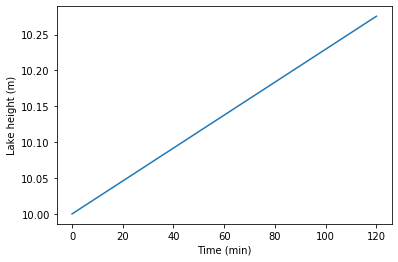

In [12]:
m.options.IMODE = 4 # Dynamic simulation with simultaneous solution of equations
m.solve(disp=False)
plt.plot(m.time,h.value)
plt.xlabel('Time (min)')
plt.ylabel('Lake height (m)')

# Step 7. Validate the model
Do your results make sense?

In order to ensure that the model predictions conform with observations from reality, you need to compare your results against measurements

If your results are inaccurate, possibly change values of the unknowns and revisit the model to make improvements or correct inaccuracies

# Step 8. Document the model
To ensure your model is clear and robust, it is always good practise to document it for others to inspect.
- Using environemnts like this (jupyter notebook) allows you to have the documentation along side the code to run the simulation